In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

In [2]:
UA = pd.read_csv('Unemployment in India.csv')

In [3]:
UA.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
UA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
UA.shape

(768, 7)

In [6]:
UA.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
UA.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
UA = UA.dropna()

In [9]:
UA.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
UA.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [11]:
UA.shape

(740, 7)

In [12]:
UA.duplicated().sum()

0

In [13]:
UA.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
UA.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [15]:
UA['Region'].value_counts().idxmax()

'Andhra Pradesh'

In [16]:
UA['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [17]:
UA['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [18]:
UA['Region'].value_counts().idxmin()

'Chandigarh'

In [19]:
import datetime as dt
import calendar

In [20]:
UA[' Date'] = pd.to_datetime(UA[' Date'], dayfirst=True)
UA['month_int'] = UA[' Date'].dt.month
UA['month'] = UA['month_int'].apply(lambda x: calendar.month_abbr[x])

In [21]:
print(UA.columns.tolist())

['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area', 'month_int', 'month']


In [22]:
#UA.get('Date', default="date")

In [23]:
UA['month'].value_counts().idxmax()

'May'

In [24]:
UA['month'].value_counts().idxmin()

'Apr'

In [25]:
UA.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [26]:
UA.drop(columns=[' Frequency','month_int'])

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [27]:
UAS = UA[['Region',' Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(' Estimated Unemployment Rate (%)',ascending=False)

In [28]:
UAS.head(12)

,Estimated Unemployment Rate (%)
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


Text(0, 0.5, 'Numbers of people unemployment %')

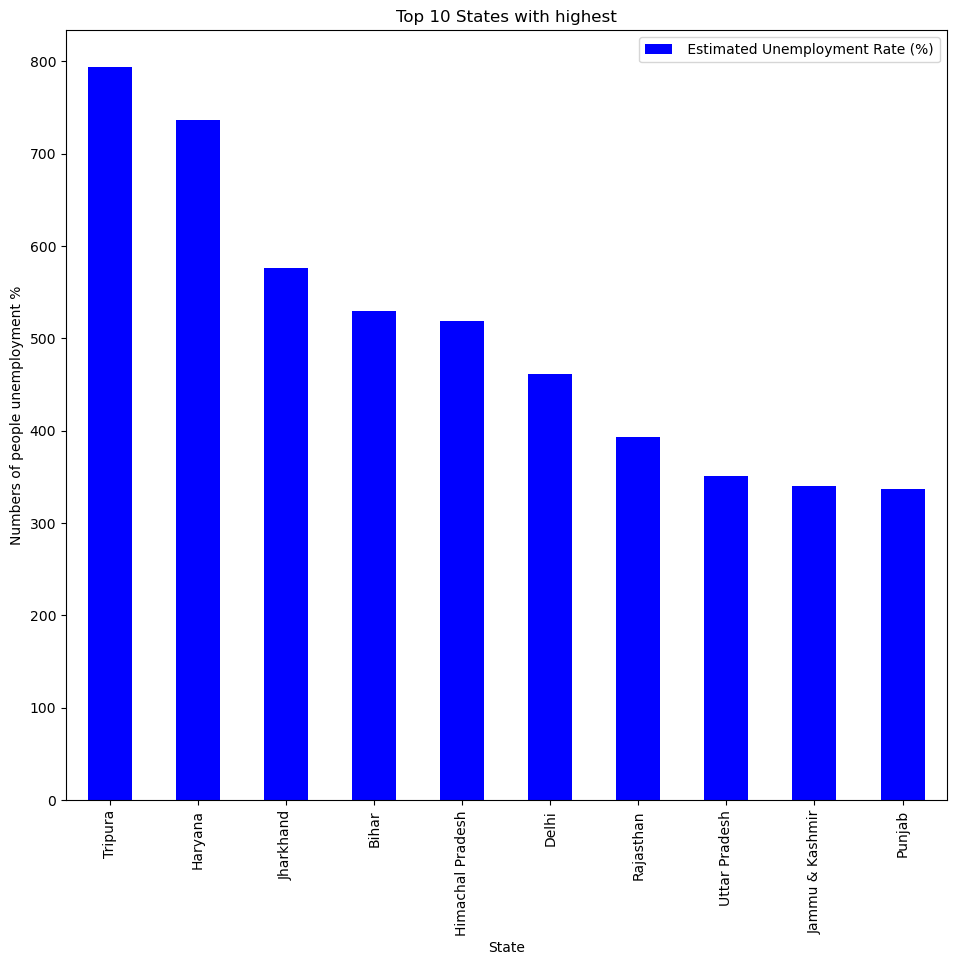

In [29]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
UAS[:10].plot(kind='bar' , color='blue', figsize=(25,10),ax=ax0)
ax0.set_title('Top 10 States with highest')
ax0.set_xlabel('State')
ax0.set_ylabel('Numbers of people unemployment %')

In [30]:
UA1 = UA[['month',' Estimated Unemployment Rate (%)']].groupby('month').sum().sort_values(by=' Estimated Unemployment Rate (%)', ascending=False)
UA1.head(10)

,Estimated Unemployment Rate (%)
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


Text(0, 0.5, 'Numbers of people unemployment %')

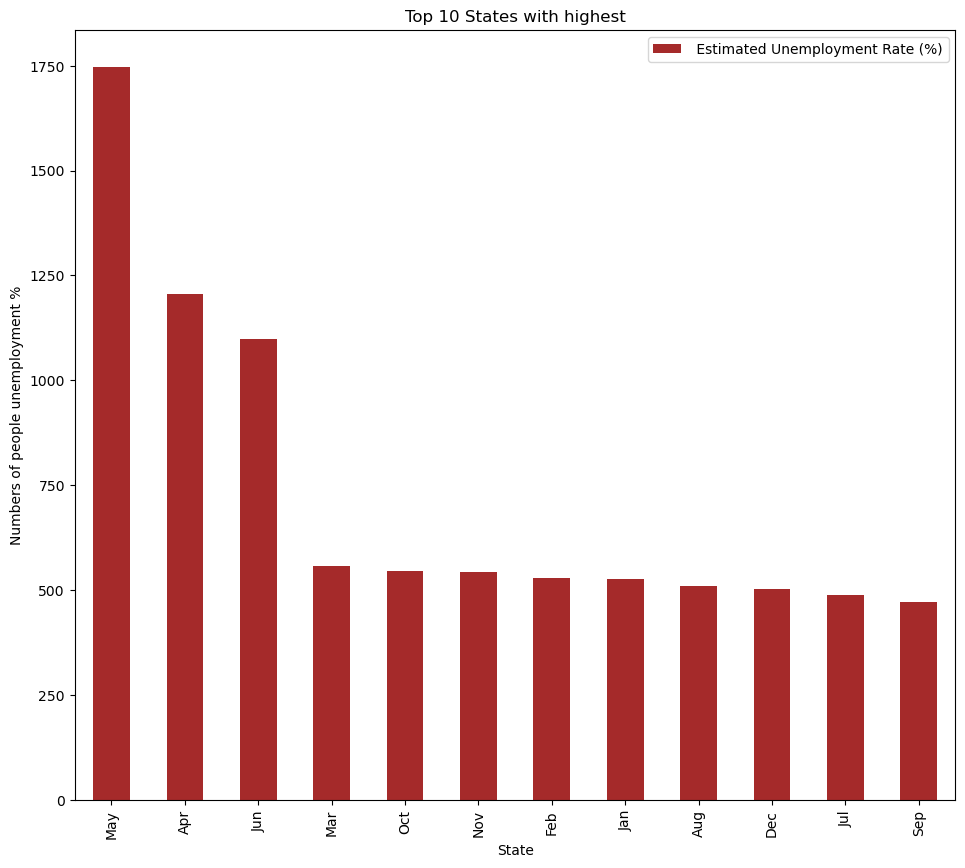

In [31]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
UA1[:12].plot(kind='bar' , color='brown', figsize=(25,10),ax=ax0)
ax0.set_title('Top 10 States with highest')
ax0.set_xlabel('State')
ax0.set_ylabel('Numbers of people unemployment %')

In [34]:
UA['month'].value_counts()

month
May    105
Jun    104
Oct     55
Nov     55
Jul     54
Aug     53
Dec     53
Jan     53
Feb     53
Sep     52
Mar     52
Apr     51
Name: count, dtype: int64

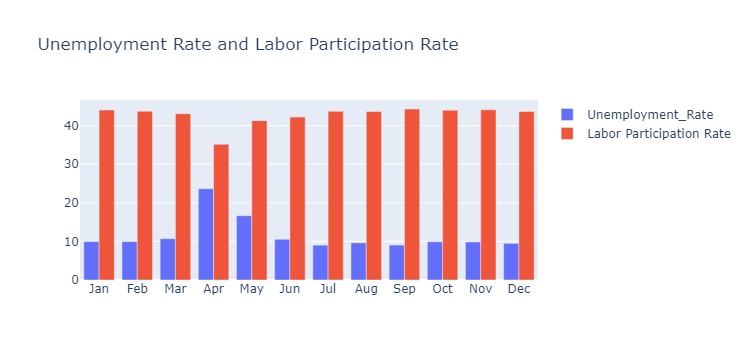

In [35]:
UA_1 = UA.groupby(['month'])[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].mean()
UA_1 = pd.DataFrame(UA_1).reset_index()
month = UA_1.month
unemployment_rate = UA_1[' Estimated Unemployment Rate (%)']
labor_participation_rate = UA_1[' Estimated Labour Participation Rate (%)']

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name = 'Unemployment_Rate'))
fig.add_trace(go.Bar(x = month, y = labor_participation_rate, name = 'Labor Participation Rate'))

fig.update_layout(title='Unemployment Rate and Labor Participation Rate', xaxis={'categoryorder':'array', 'categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})

In [36]:
UA_2 = UA[['Region', ' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed', ascending=False)
UA_2

,Estimated Employed
Region,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


Text(0, 0.5, 'Number of Estimated Employed')

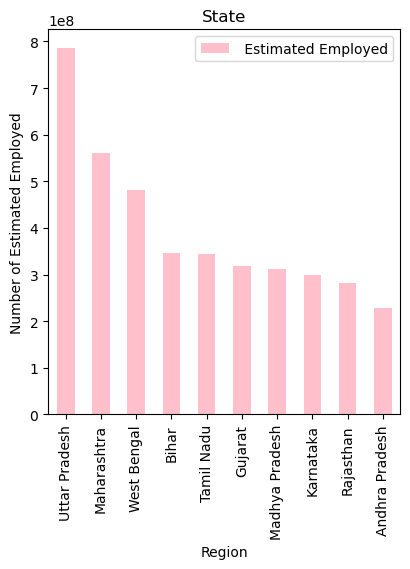

In [38]:
UA_2 = UA[['Region', ' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed', ascending=False)
UA_2.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

UA_2[:10].plot(kind='bar',color='pink', figsize=(10,5), ax=ax1)
ax1.set_title('Estimated Employed people in each state')
ax1.set_title('State')
ax1.set_ylabel('Number of Estimated Employed')

In [39]:
UA_21 = UA[['Region',' Estimated Unemployment Rate (%)' ]].groupby('Region').sum().sort_values(' Estimated Unemployment Rate (%)', ascending=False)
UA_21 

,Estimated Unemployment Rate (%)
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


Text(0, 0.5, 'Estimated Unemployed Rate (in %)')

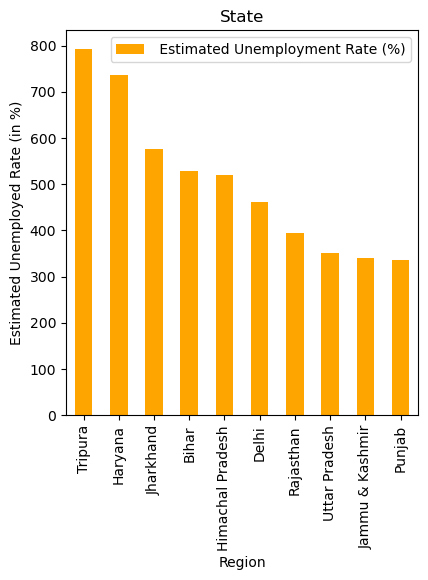

In [42]:
UA_21 = UA[['Region',' Estimated Unemployment Rate (%)' ]].groupby('Region').sum().sort_values(' Estimated Unemployment Rate (%)', ascending=False)
UA_21.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

UA_21[:10].plot(kind='bar',color='orange', figsize=(10,5), ax=ax1)
ax1.set_title('Estimated Unemployment rate in each state')
ax1.set_title('State')
ax1.set_ylabel('Estimated Unemployed Rate (in %)')

In [44]:
UA_3 = UA[['month',' Estimated Employed']].groupby('month').sum().sort_values(' Estimated Employed', ascending=False)
UA_3

,Estimated Employed
month,
Jun,766717078.0
May,699995530.0
Jan,406899254.0
Feb,403011803.0
Sep,402452126.0
Oct,401411032.0
Nov,400051335.0
Jul,399838967.0
Aug,399610205.0


Text(0, 0.5, 'Number of Estimated Employed')

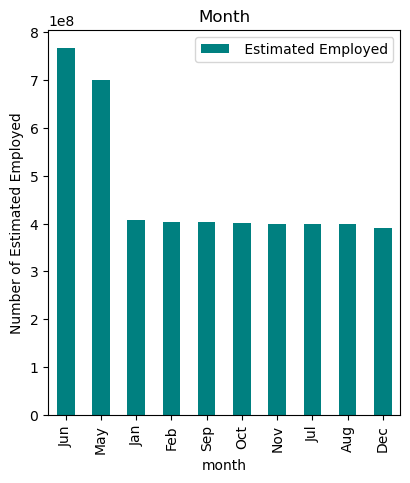

In [45]:
UA_3 = UA[['month', ' Estimated Employed']].groupby('month').sum().sort_values(' Estimated Employed', ascending=False)
UA_3.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

UA_3[:10].plot(kind='bar',color='teal', figsize=(10,5), ax=ax1)
ax1.set_title('Estimated Employed people in each Month')
ax1.set_title('Month')
ax1.set_ylabel('Number of Estimated Employed')

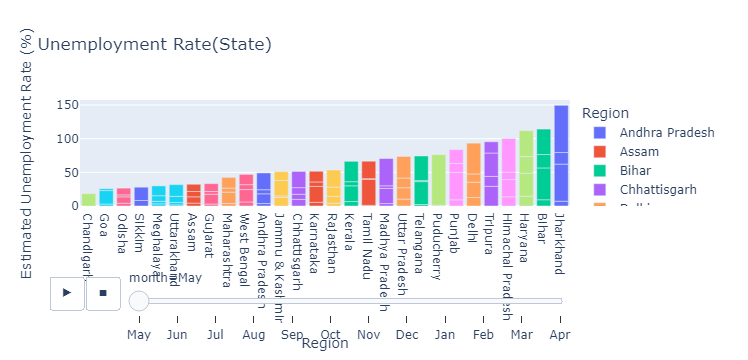

In [51]:
fig = px.bar(UA, x='Region', y=' Estimated Unemployment Rate (%)', animation_frame='month',color='Region', title='Unemployment Rate(State)')

fig.update_layout(xaxis={'categoryorder':'total ascending'})

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=2000

fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



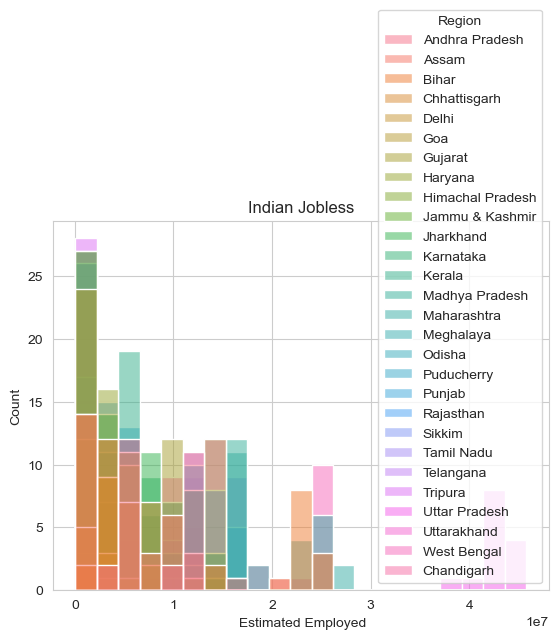

In [92]:
plt.title("Indian Jobless")  
sns.histplot(x=' Estimated Employed', hue="Region", data=UA)  
plt.show()  

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



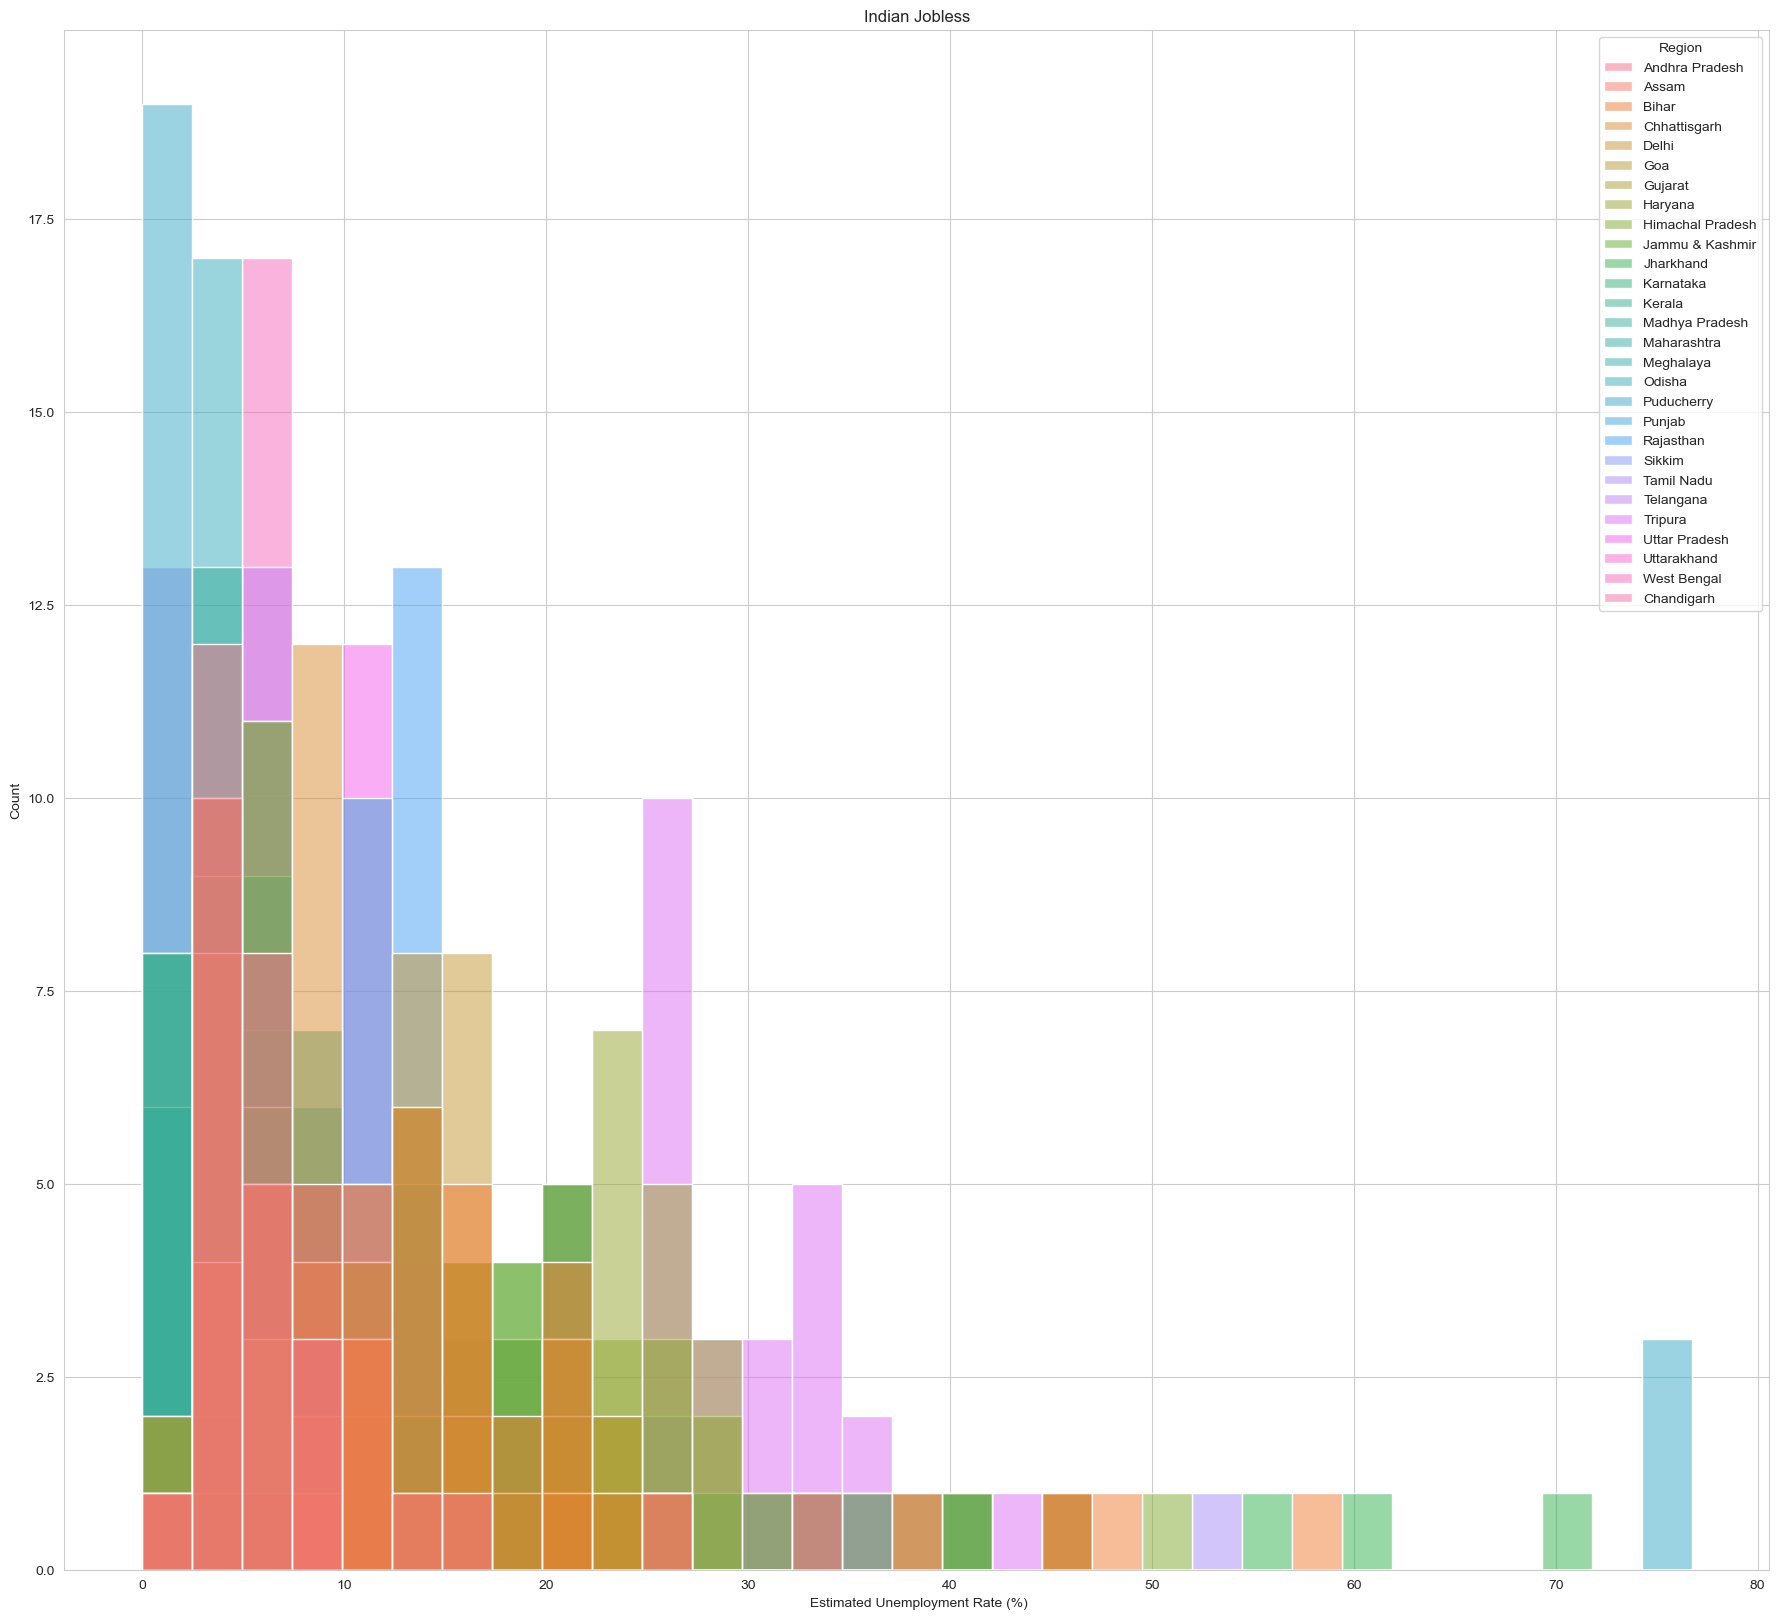

In [90]:
plt.figure(figsize=(22, 20))  
plt.title("Indian Jobless")  
sns.histplot(x=' Estimated Unemployment Rate (%)', hue="Region", data=UA) 
plt.show()  

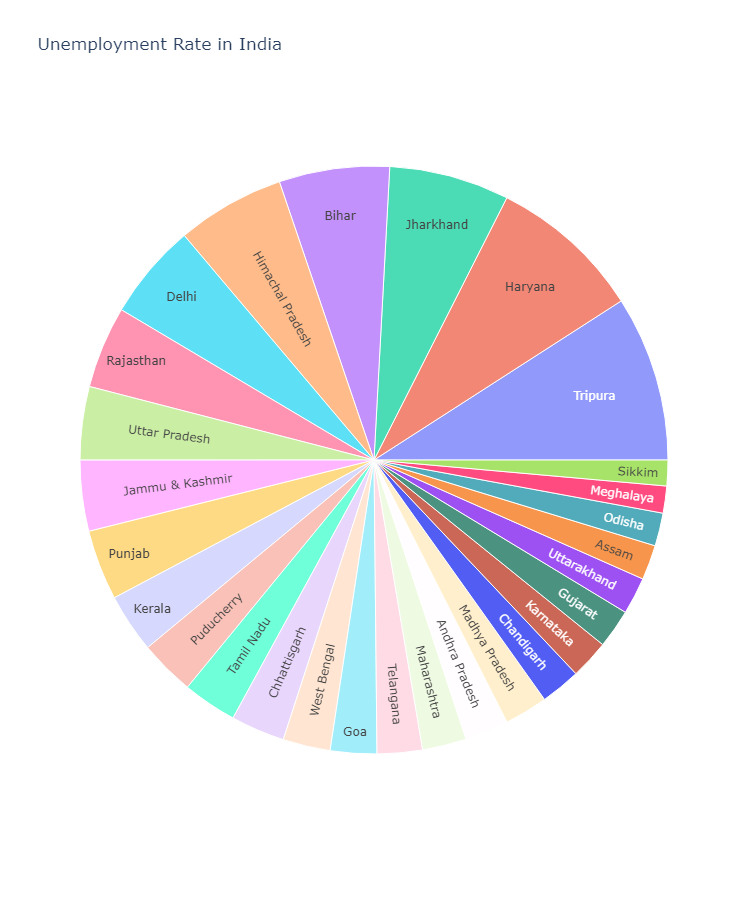

In [95]:
unemployment = UA[["Region",' Estimated Unemployment Rate (%)' ]]  
figure = px.sunburst(unemployment, path=["Region"],   
                     values=' Estimated Unemployment Rate (%)',   
                     width=900, height=900, color_continuous_scale="RdY2Gn",   
                     title="Unemployment Rate in India")  
figure.show()  